In [2]:
import numpy as np

In [3]:
np.float32(1e-50)#丸め誤差

0.0

In [4]:
#中心差分による数値微分の実装
def numerical_diff(f, x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [5]:
def function_1(x):
    return 0.01*x**2+0.1*x

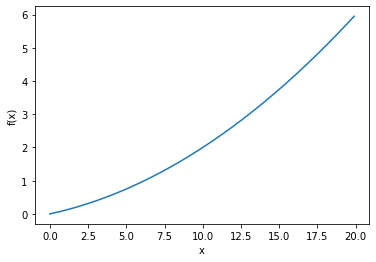

In [7]:
import matplotlib.pyplot as plt

x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [8]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [9]:
def function_2(x):
    return x[0]**2+x[1]**2

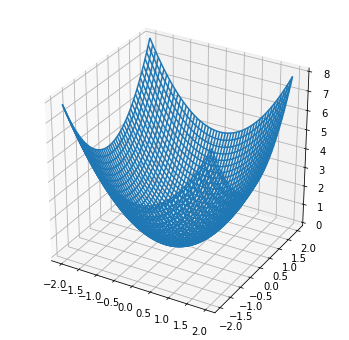

In [15]:
from mpl_toolkits.mplot3d import Axes3D
x, y=np.meshgrid(np.arange(-2, 2, 0.04), np.arange(2, -2, -0.04))
z=x**2+y**2
fig = plt.figure(figsize=(6, 6))
axes = fig.add_subplot(111, projection='3d')
axes.plot_wireframe(x,y,z)
plt.show()

In [19]:
def numerical_gradient(f, x):
    h=1e-4
    grad=np.zeros_like(x)#xと同じ形状の0による配列を生成
    
    for idx in range(x.size):
        tmp_val=x[idx]
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    
    return grad

In [20]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [21]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f, x)
        x-=lr*grad
        
    return x

In [22]:
init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)#ガウス分布で初期化
        
    def predict(self, x):#予測するためのメソッド
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        
        return loss

In [13]:
net=simpleNet()
print(net.W)
x=np.array([0.6, 0.9])
p=net.predict(x)
print(p)
print(np.argmax(p))#最大値のインデックス
t=np.array([0, 0, 1])#正解のラベル
print(net.loss(x,t))

[[-0.73023913  0.32045594  0.61906567]
 [-0.95106902  2.09186244  1.73056535]]
[-1.29410559  2.07494976  1.92894821]
1
0.7871067767865384


In [19]:
def f(W):
    return net.loss(x,t)
#またはlambdaを用いて
f=lambda w: net.loss(x,t)
#lambdaはlambda 引数: 返り値　とかける

In [17]:
dW=numerical_gradient(f, net.W)
print(dW)

[[ 0.01087829  0.31602584 -0.32690413]
 [ 0.01631743  0.47403876 -0.49035619]]


In [23]:
def f(x):
    return b
b=10
print(f(3))

10
